In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

# Loading in Datasets and Preprocessing

In [2]:
# Reading in annotations from CSV file 
bee_data = pd.read_csv('/Users/evelynjohnson/Desktop/METIS/Deep_Learning/Project/bee_images/bee_data.csv')

In [3]:
bee_data.head()

,file,date,time,location,zip code,subspecies,health,pollen_carrying,caste
0,041_066.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
1,041_072.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
2,041_073.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
3,041_067.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
4,041_059.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker


In [4]:
bee_annot = bee_data[['file', 'health']].copy()

In [5]:
labels = {'Varroa, Small Hive Beetles':'Many Varroa', 'missing queen':'Missing Queen', 
         'ant problems':'Ants', 'few varrao, hive beetles': 'Few Varroa', 'healthy':'Healthy',
         'hive being robbed': 'Hive Theft'}
bee_annot.health = bee_annot.health.map(labels)

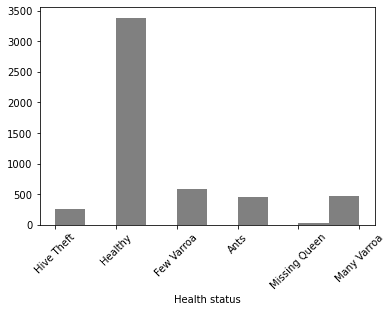

In [6]:
plt.hist(bee_annot.health, 
         orientation='vertical',
        color='grey')

plt.xlabel('Health status')
plt.xticks(rotation=45)
plt.savefig('beehealth.png', transparent=True, bbox_inches='tight')

In [9]:
health_cats = list(bee_annot['health'].unique())

values = list(range(0,6))

cats = {health_cats[i]: values[i] for i in range(len(values))}
cats

{'Hive Theft': 0,
 'Healthy': 1,
 'Few Varroa': 2,
 'Ants': 3,
 'Missing Queen': 4,
 'Many Varroa': 5}

In [10]:
# Assigning health condition categories to integer
bee_annot.health = bee_annot.health.map(cats)

bee_annot.health.value_counts()

1    3384
2     579
5     472
3     457
0     251
4      29
Name: health, dtype: int64

#### Adding Image Data

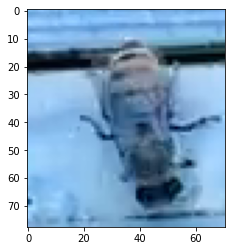

In [11]:
path = '/Users/evelynjohnson/Desktop/METIS/Deep_Learning/Project/bee_images/bee_imgs/bee_imgs'

for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_UNCHANGED)
    plt.imshow(img_array)
    break

In [12]:
img_test = cv2.imread(os.path.join(path,'030_204.png'), cv2.IMREAD_COLOR)
print(img_test.shape)

print('Min: %.3f, Max: %.3f' % (img_test.min(), img_test.max()))

(78, 71, 3)
Min: 0.000, Max: 255.000


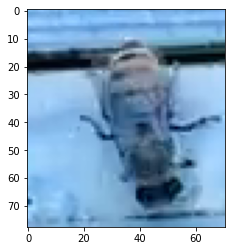

In [13]:
size = 255

#array = cv2.resize(img_array, (size, size))
plt.imshow(img_test)
plt.show()

In [14]:
def create_annot_data(size=128):
    images = []
    conditions = []
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_COLOR)
        if img_array is None:
            pass
        else:
            array = cv2.resize(img_array, (size, size))
        
            health_num = bee_annot.loc[bee_annot['file'] == img].health

            images.append(array)
            conditions.append(health_num)
    return images, conditions
        

In [15]:
X, y = create_annot_data(size=224)

In [16]:
import pickle

pickle_out = open('X.pickle', 'wb')
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open('y.pickle', 'wb')
pickle.dump(y, pickle_out)
pickle_out.close()

# Split Data in Train and Test Sets

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_reshape = np.array(X).reshape((-1,100,100,3)) #100x100 images with 3 color channels

X_train, X_test, y_train, y_test = (train_test_split(X_reshape, y, 
                                                     test_size = .2, random_state = 42))